In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os, sys
from collections import defaultdict
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_roc_curve,plot_confusion_matrix

In [2]:
!git clone https://github.com/avidutta20/challenge_may21

Cloning into 'challenge_may21'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 40 (delta 13), reused 26 (delta 6), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [3]:
os.chdir('/content/challenge_may21/')

In [4]:
def load_data():
    pass
df = pd.read_csv('dataset/av_jobathon_may21_train.csv')

# creating a list of all trainable features name
feature_list = df.columns[1:10]
target = df.columns[10]  # 'Is_Lead' column name

# splitting into train & test
x_train, x_test, y_train, y_test = train_test_split(df[feature_list], df[target], test_size=0.25, random_state=25)


In [5]:
def execute_process(dframe, colname,func,arg1):
    dframe[colname] = dframe[colname].apply(lambda x: func(x,arg1))
    return dframe
def extract_process(value,index):
    value = int(value[index:])
    return value

def replace_values(value, value_dic):
    # replaces any value in the dframe colname with given dict
    return value_dic[value]


def default_value():
    return 0

In [6]:
gender_dic = is_active_dic = occupation_dic = defaultdict(default_value)
#%%
gender_dic = {'Male': 0,
                'Female': 1}
is_active_dic = {'Yes': 1,
                 'No': 0}

occupation_dic = {'Self_Employed': 1,
                     'Other': 2,
                     'Salaried': 3,
                     'Entrepreneur': 4}

In [11]:
def process(dframe, default_func = default_value):

  gender_dic = is_active_dic = occupation_dic = defaultdict(default_value)
  
  gender_dic = {'Male': 0,
                  'Female': 1}
  is_active_dic = {'Yes': 1,
                  'No': 0}

  occupation_dic = {'Self_Employed': 1,
                      'Other': 2,
                      'Salaried': 3,
                      'Entrepreneur': 4}

  execute_process(dframe,'Region_Code', extract_process, 2)
  print('Region Code Processed Successfully')

  execute_process(dframe,'Channel_Code', extract_process, 1)
  print('Channel Code Processed Successfully')

  execute_process(dframe,'Gender', replace_values, gender_dic)
  print('Gender Processed Successfully')

  execute_process(dframe,'Occupation', replace_values, occupation_dic)
  print('Occupation Processed Successfully')

  execute_process(dframe,'Is_Active',replace_values, is_active_dic)
  print('Is Active Processed Successfully')

  dframe['Credit_Product'] = dframe['Credit_Product'].fillna('No')
  execute_process(dframe,'Credit_Product',replace_values, is_active_dic)
  return dframe

In [8]:
# %% Implementing Random Forests

clf_rforest = RandomForestClassifier(ccp_alpha)
clf_rforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# %%
# getting important features
imp_feature = {}
for feat_name, weight in zip(feature_list, clf_rforest.feature_importances_):
    imp_feature[feat_name] = weight


for key in imp_feature:
    print(f'{key} : {round(imp_feature[key],5)*100}')

Gender : 1.9349999999999998
Age : 19.601
Region_Code : 13.320000000000002
Occupation : 5.315
Channel_Code : 5.958
Vintage : 19.691
Credit_Product : 1.313
Avg_Account_Balance : 31.137999999999998
Is_Active : 1.729


In [12]:
# processing x_test
x_test = process(dframe= x_test)

Region Code Processed Successfully
Channel Code Processed Successfully
Gender Processed Successfully
Occupation Processed Successfully
Is Active Processed Successfully


In [26]:
y_pred = clf_rforest.predict(x_test)
y_pred_proba = clf_rforest.predict_proba(x_test)

In [29]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(accuracy)

0.7780472717801797


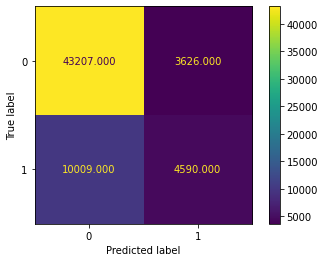

In [20]:
plot_confusion_matrix(estimator= clf_rforest,X=x_test, y_true=y_test, values_format= '.3f')

In [30]:
roc_auc_score(y_true=y_test, y_score=y_pred_proba[:,1])

0.7557598676935209

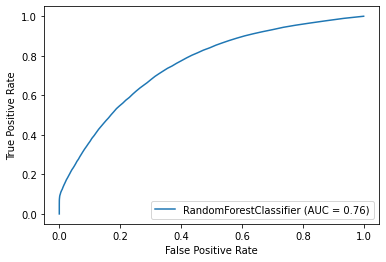

In [32]:
plot_roc_curve(clf_rforest, X=x_test, y=y_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:

# using logistic_regression
clf_logistic = LogisticRegression()
clf_logistic.fit(x_train, y_train)
y_hat_logistic = 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)